## **DATA PREPROCESSING AND FEATURE ENGINEERING**





### **LOADING THE DATASET**

In [39]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('darkgrid')
from matplotlib import pyplot as plt
%matplotlib inline

In [40]:
data = pd.read_csv("/content/customer_churn_large_dataset.csv")
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [41]:
len(data)

100000

### **Initial data preparation(Checking certain things)**

In [42]:
data.head().T

,0,1,2,3,4
CustomerID,1,2,3,4,5
Name,Customer_1,Customer_2,Customer_3,Customer_4,Customer_5
Age,63,62,24,36,46
Gender,Male,Female,Female,Female,Female
Location,Los Angeles,New York,Los Angeles,Miami,Miami
Subscription_Length_Months,17,1,5,3,19
Monthly_Bill,73.36,48.76,85.47,97.94,58.14
Total_Usage_GB,236,172,460,297,266
Churn,0,0,0,1,0


**Displaying the data types of different attributes**



In [43]:
data.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [44]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

string_columns = list(data.dtypes[data.dtypes == 'object'].index)

for col in string_columns:
    data[col] = data[col].str.lower().str.replace(' ', '_')

In [45]:
data.head()

,customerid,name,age,gender,location,subscription_length_months,monthly_bill,total_usage_gb,churn
0,1,customer_1,63,male,los_angeles,17,73.36,236,0
1,2,customer_2,62,female,new_york,1,48.76,172,0
2,3,customer_3,24,female,los_angeles,5,85.47,460,0
3,4,customer_4,36,female,miami,3,97.94,297,1
4,5,customer_5,46,female,miami,19,58.14,266,0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   customerid                  100000 non-null  int64  
 1   name                        100000 non-null  object 
 2   age                         100000 non-null  int64  
 3   gender                      100000 non-null  object 
 4   location                    100000 non-null  object 
 5   subscription_length_months  100000 non-null  int64  
 6   monthly_bill                100000 non-null  float64
 7   total_usage_gb              100000 non-null  int64  
 8   churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


**Checking for missing values**

In [47]:
data.isnull().sum()

customerid                    0
name                          0
age                           0
gender                        0
location                      0
subscription_length_months    0
monthly_bill                  0
total_usage_gb                0
churn                         0
dtype: int64

This shows that there are no any missing values



**Checking for duplicate values**

In [48]:
data.duplicated().sum()

0

**Checking the number of unique values**

In [49]:
data.nunique()

customerid                    100000
name                          100000
age                               53
gender                             2
location                           5
subscription_length_months        24
monthly_bill                    7001
total_usage_gb                   451
churn                              2
dtype: int64

**describe() gives the statistical summary of the numerical features**

In [50]:
data.describe()

,customerid,age,subscription_length_months,monthly_bill,total_usage_gb,churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


**Dropping the column 'name' as it is not necessary**

In [51]:
data.drop(columns='name',axis=1,inplace=True)

In [52]:
data.head()

,customerid,age,gender,location,subscription_length_months,monthly_bill,total_usage_gb,churn
0,1,63,male,los_angeles,17,73.36,236,0
1,2,62,female,new_york,1,48.76,172,0
2,3,24,female,los_angeles,5,85.47,460,0
3,4,36,female,miami,3,97.94,297,1
4,5,46,female,miami,19,58.14,266,0


**Finding the count of numerical and categorical features**

In [53]:
numeric_features = [feature for feature in data.columns if data[feature].dtype != "object"]
categorical_features = [feature for feature in data.columns if data[feature].dtype == "object"]

print("We have {} numerical features: {}".format(len(numeric_features),numeric_features))
print("We have {} categorical features: {}".format(len(categorical_features),categorical_features))

We have 6 numerical features: ['customerid', 'age', 'subscription_length_months', 'monthly_bill', 'total_usage_gb', 'churn']
We have 2 categorical features: ['gender', 'location']


**Count for the column churn for the values 0 and 1 where, o means customer is not churned and 1 means customer is churned**

In [54]:
data['churn'].value_counts()

0    50221
1    49779
Name: churn, dtype: int64

**Data Visualisation**

<Axes: xlabel='churn', ylabel='count'>

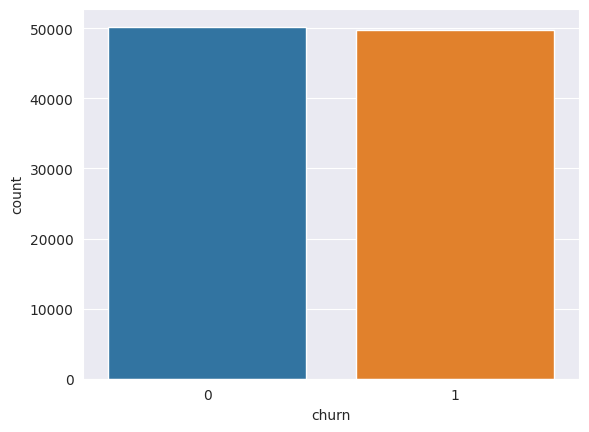

In [55]:
sns.countplot(data=data,x=data['churn'])

As from the plot it shows both are same but there is slight variation between those values

In [56]:
numeric_columns = data.select_dtypes(exclude="object")
categorical_column = data.select_dtypes(include="object")

<Figure size 600x500 with 0 Axes>

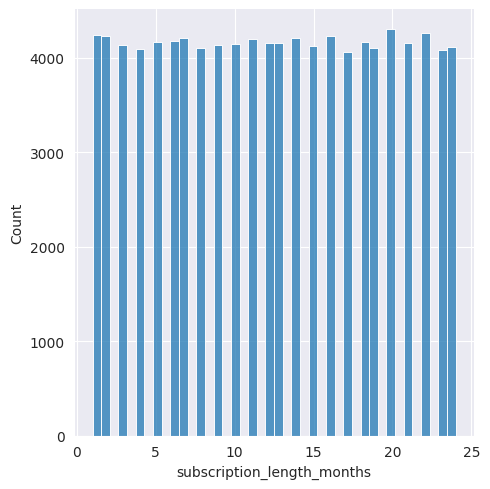

In [57]:
plt.figure(figsize=(6,5))
sns.displot(data['subscription_length_months'])
plt.show()

<Figure size 600x500 with 0 Axes>

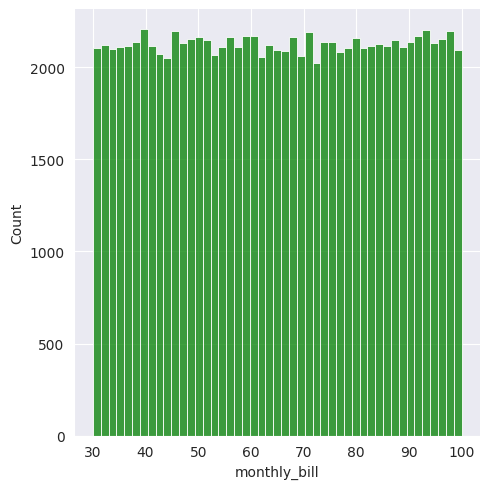

In [58]:
plt.figure(figsize=(6,5))
sns.displot(data['monthly_bill'],color='green')
plt.show()

<Figure size 600x500 with 0 Axes>

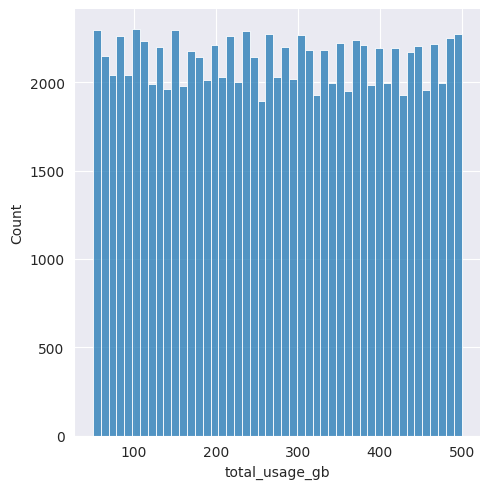

In [59]:
plt.figure(figsize=(6,5))
sns.displot(data['total_usage_gb'])
plt.show()

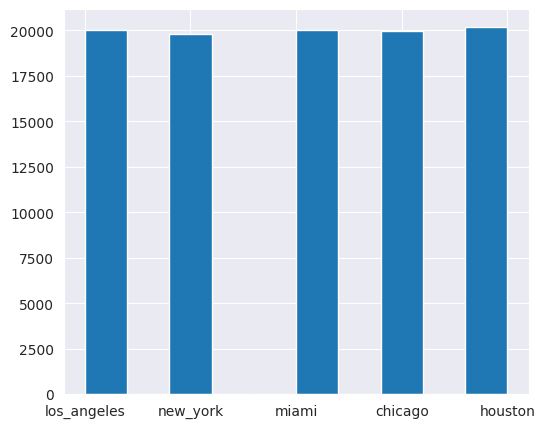

In [60]:
plt.figure(figsize=(6,5))
plt.hist(x = data['location'])
plt.show()

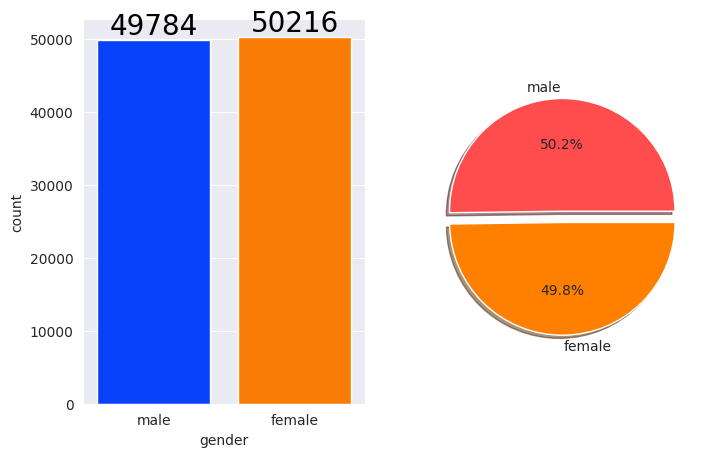

In [61]:
f,ax=plt.subplots(1,2,figsize=(8,5))
sns.countplot(x=data['gender'],data=data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=data['gender'].value_counts(),labels=['male','female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

**Encoding the categorical variables**

In [62]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoding(data):
    categorical_column = data.select_dtypes(include=["object"]).columns

    one_hot_encoder = OneHotEncoder(sparse=False,handle_unknown="ignore")
    one_hot_encoded = one_hot_encoder.fit_transform(data[categorical_column])

    one_hot_encoded = pd.DataFrame(
        one_hot_encoded,columns=one_hot_encoder.get_feature_names_out(categorical_column)
    )

    data = data.drop(categorical_column,axis=1)

    data = pd.concat([data,one_hot_encoded],axis=1)
    return data

In [63]:
data = one_hot_encoding(data)
data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,customerid,age,subscription_length_months,monthly_bill,total_usage_gb,churn,gender_female,gender_male,location_chicago,location_houston,location_los_angeles,location_miami,location_new_york
0,1,63,17,73.36,236,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2,62,1,48.76,172,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,24,5,85.47,460,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,36,3,97.94,297,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,46,19,58.14,266,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## **MODEL TRAINING**

### **Importing Libraries**

In [64]:
!pip install catboost

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,roc_auc_score

In [66]:
data.head()

,customerid,age,subscription_length_months,monthly_bill,total_usage_gb,churn,gender_female,gender_male,location_chicago,location_houston,location_los_angeles,location_miami,location_new_york
0,1,63,17,73.36,236,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2,62,1,48.76,172,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,24,5,85.47,460,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,36,3,97.94,297,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,46,19,58.14,266,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### **Prepare X and Y variables for splitting into training and testing dataset**

In [67]:
X = data.drop(columns="churn",axis=1)

In [68]:
y = data['churn']

In [69]:
X.head()

,customerid,age,subscription_length_months,monthly_bill,total_usage_gb,gender_female,gender_male,location_chicago,location_houston,location_los_angeles,location_miami,location_new_york
0,1,63,17,73.36,236,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2,62,1,48.76,172,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,24,5,85.47,460,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,36,3,97.94,297,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,46,19,58.14,266,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [70]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: churn, dtype: int64

In [71]:
X.std()

customerid                    28867.657797
age                              15.280283
subscription_length_months        6.926461
monthly_bill                     20.230696
total_usage_gb                  130.463063
gender_female                     0.499998
gender_male                       0.499998
location_chicago                  0.399687
location_houston                  0.401175
location_los_angeles              0.400309
location_miami                    0.400234
location_new_york                 0.398593
dtype: float64

### **Applying scaling or normalisation to the dataset**

In [72]:
X_scaled = StandardScaler().fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)
X.std()

customerid                    1.000005
age                           1.000005
subscription_length_months    1.000005
monthly_bill                  1.000005
total_usage_gb                1.000005
gender_female                 1.000005
gender_male                   1.000005
location_chicago              1.000005
location_houston              1.000005
location_los_angeles          1.000005
location_miami                1.000005
location_new_york             1.000005
dtype: float64

In [73]:
X.head()

,customerid,age,subscription_length_months,monthly_bill,total_usage_gb,gender_female,gender_male,location_chicago,location_houston,location_los_angeles,location_miami,location_new_york
0,-1.732033,1.241670,0.651115,0.410606,-0.294289,-1.004329,1.004329,-0.499344,-0.502452,1.997441,-0.500484,-0.497076
1,-1.731999,1.176226,-1.658879,-0.805374,-0.784852,0.995689,-0.995689,-0.499344,-0.502452,-0.500641,-0.500484,2.011763
2,-1.731964,-1.310651,-1.081380,1.009204,1.422681,0.995689,-0.995689,-0.499344,-0.502452,1.997441,-0.500484,-0.497076
3,-1.731930,-0.525321,-1.370129,1.625597,0.173279,0.995689,-0.995689,-0.499344,-0.502452,-0.500641,1.998065,-0.497076
4,-1.731895,0.129120,0.939864,-0.341720,-0.064338,0.995689,-0.995689,-0.499344,-0.502452,-0.500641,1.998065,-0.497076


### **Splitting the dataset into train and test**

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((80000, 12), (20000, 12))

In [75]:
modelss = {
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(),
}
model_list = []
for i in range(len(list(modelss))):
    modell = list(modelss.values())[i]
    modell.fit(X_train,y_train)

    y_train_preiction = modell.predict(X_train)
    y_test_prediction = modell.predict(X_test)

    print(list(modelss.keys())[i])
    model_list.append(list(modelss.keys())[i])


    print('Model performance for Training set')
    print("- accuracy score of train: {:.4f}".format(accuracy_score(y_train,y_train_preiction)))
    print("- f1_score: {:.4f}".format(f1_score(y_train,y_train_preiction)))
    print("- roc_auc_score : {:.4f}".format(roc_auc_score(y_train,y_train_preiction)))
    print("- confusion_matrix : ")
    print(confusion_matrix(y_train,y_train_preiction))
    print("- classification report : ")
    print(classification_report(y_train,y_train_preiction))

    print("----------------------------------------------")

    print('Model performance for Testing set')
    print("- accuracy score of train: {:.4f}".format(accuracy_score(y_test,y_test_prediction)))
    print("- f1_score: {:.4f}".format(f1_score(y_test,y_test_prediction)))
    print("- roc_auc_score : {:.4f}".format(roc_auc_score(y_test,y_test_prediction)))
    print("- confusion_matrix : ")
    print(confusion_matrix(y_test,y_test_prediction))
    print("- classification report : ")
    print(classification_report(y_test,y_test_prediction))

    print("="*30)
    print("\n")

DecisionTreeClassifier
Model performance for Training set
- accuracy score of train: 1.0000
- f1_score: 1.0000
- roc_auc_score : 1.0000
- confusion_matrix : 
[[40142     0]
 [    0 39858]]
- classification report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40142
           1       1.00      1.00      1.00     39858

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000

----------------------------------------------
Model performance for Testing set
- accuracy score of train: 0.5003
- f1_score: 0.5001
- roc_auc_score : 0.5004
- confusion_matrix : 
[[5008 5071]
 [4922 4999]]
- classification report : 
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     10079
           1       0.50      0.50      0.50      9921

    accuracy                           0.50     20000
   m

## **Model Optimization**

### **Hyperparameter Tunning**

In [76]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters for each model
param_grid = {
    "DecisionTreeClassifier": {
        "max_depth": [5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "AdaBoostClassifier": {
        "n_estimators": [50, 100, 150],
        "learning_rate": [0.05, 0.1, 0.2]
    },
    "KNeighborsClassifier": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"]
    },
    "LogisticRegression": {
        "penalty": ["l1", "l2"],
        "C": [0.1, 1, 10],
        "solver": ["liblinear"]
    }
}

# Perform hyperparameter tuning for each model
for model_name, model in modelss.items():
    print(f"Performing hyperparameter tuning for {model_name}...")
    param_options = param_grid.get(model_name, {})
    if len(param_options) == 0:
        print(f"No hyperparameters found for {model_name}. Skipping...")
        continue
    grid_search = GridSearchCV(model, param_options, cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best score: {grid_search.best_score_:.4f}")
    print("=" * 30)

Performing hyperparameter tuning for DecisionTreeClassifier...
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score: 0.5009
Performing hyperparameter tuning for AdaBoostClassifier...
Best parameters: {'learning_rate': 0.2, 'n_estimators': 50}
Best score: 0.5027
Performing hyperparameter tuning for KNeighborsClassifier...
Best parameters: {'n_neighbors': 5, 'weights': 'uniform'}
Best score: 0.5022
Performing hyperparameter tuning for LogisticRegression...
Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.5020


From here we can analyse that AdaBoostClassifier is the best model to predict whether the customer is churned or not

In [82]:
import joblib
joblib.dump(AdaBoostClassifier(), "cust_predict.sav")

['cust_predict.sav']

In [87]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.6/188.6 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 27.1 MB/s eta 0:00:00
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzlocal-5.0.1:
      Successfully uninstalled tzlocal-5.0.1


In [90]:
import joblib
def predict(data):
  clf = joblib.load("cust_predict.sav")
  return clf.predict(data)

In [92]:
import streamlit as st
import pandas as pd
import numpy as np

In [93]:
st.title('Predicting customer churn')
st.markdown('Input the values tocheck whether the customer is churned or not')

2023-09-05 16:46:17.018 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [94]:
st.header("Input the values")
col1, col2 = st.columns(2)
with col1:
 CustId = st.slider('ID', 1, 1000, 5)
 Age = st.slider('Ag', 20,70,5)
with col2:
  Subsription = st.slider('Sub', 2, 30, 5)
  Usage_gb = st.slider('Gb', 100, 300, 5)

In [95]:
st.button("Predict")

False

In [97]:
if st.button("Predict"):
  result = predict(np.array([[CustId, Age, Subsription, Usage_gb]]))
  st.text(result[0])